In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import cv2

# load an Image

In [2]:
img = plt.imread('images/photo1.jpg')

In [3]:
def drawImg(img):
    plt.imshow(img)
    cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.show()

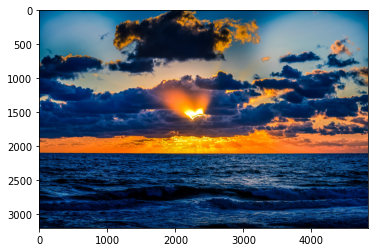

In [4]:
drawImg(img)

# Flatten the image

In [5]:
# def flatten(img):
#     actual_shape = img.shape
#     all_pixels = img.reshape((actual_shape[0] * actual_shape[1] , actual_shape[2]))
#     return actual_shape , all_pixels


In [6]:
# actual_shape , all_pixels = flatten(img)
# print(actual_shape)
# print(all_pixels.shape)
# all_pixels
actual_shape = img.shape
all_pixels = img.reshape((actual_shape[0] * actual_shape[1] , actual_shape[2]))
print(all_pixels[1])

[  1  73 123]


# Use KMeans to predict cluster_centers

In [7]:
dominant_colors = 7
km = KMeans(n_clusters= dominant_colors)
km.fit(all_pixels)
centers = km.cluster_centers_
print(centers)

[[ 19.53495732  91.90375786 144.81681896]
 [108.96667611  79.27226409  77.9524705 ]
 [178.56938627 172.59846894 160.10015016]
 [237.34133764 135.68845937  35.9619473 ]
 [  6.99337441  41.19019697  88.08129333]
 [  3.6172427   13.9361624   36.7243609 ]
 [105.15863035 148.91899197 176.40242874]]


In [8]:
centers = np.array(centers , dtype='uint8')
print(centers)

[[ 19  91 144]
 [108  79  77]
 [178 172 160]
 [237 135  35]
 [  6  41  88]
 [  3  13  36]
 [105 148 176]]


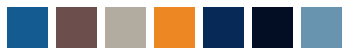

In [9]:

i = 1
colors = []
    
for each_color in centers:
    plt.subplot(1 , 7 , i)
    i += 1
        
    colors.append(each_color)
        
    a = np.zeros(( 100 , 100 ,3 ) , dtype = 'uint8')
    plt.axis('off')
    a[: , : , : ] = each_color
    plt.imshow(a)
    

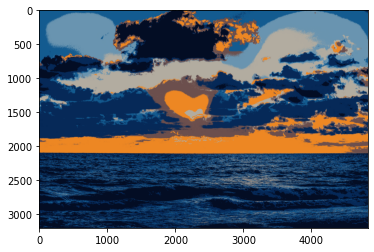

In [10]:

new_img = np.zeros((all_pixels.shape) , dtype='uint8')
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
new_img = new_img.reshape(actual_shape)
plt.imshow(new_img)

In [11]:
color = ['green' , 'yellow' , 'pink' , 'blue' , 'red' , 'black' , 'white']

clusters = {}
k = 7
for i in range(k):
    cluster_centers = 10 * (2 * np.random.random((3,)))
    
    points = []
    
    cluster = {
        'center' : cluster_centers,
        'points' : points,
        'color' : color[i]
    }
    
    clusters[i] = cluster


In [12]:
clusters

{0: {'center': array([5.55130748, 7.14762654, 8.736425  ]),
  'points': [],
  'color': 'green'},
 1: {'center': array([ 2.82391411, 10.75008713, 14.06666266]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([ 1.16696014, 12.55830284, 14.20218562]),
  'points': [],
  'color': 'pink'},
 3: {'center': array([4.13596896, 3.90433316, 5.501338  ]),
  'points': [],
  'color': 'blue'},
 4: {'center': array([12.16254653, 11.66125038,  7.84116162]),
  'points': [],
  'color': 'red'},
 5: {'center': array([ 3.50210084, 16.38887863, 19.72305653]),
  'points': [],
  'color': 'black'},
 6: {'center': array([15.8644388 ,  4.79372507,  0.72425655]),
  'points': [],
  'color': 'white'}}

In [13]:
def distance(x1 , x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [14]:
def assignPoints(clusters):
    m = all_pixels.shape[0]
    
    for i in range(m):
        points = []
        dist = []
        curr_x = all_pixels[i]
        
        for j in range(k):
            d = distance(curr_x , clusters[j]['center'])
            dist.append(d)
        
        curr_cluster  = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
        

In [15]:
assignPoints(clusters)

In [16]:
print(clusters)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

